In [1339]:
# Importing librarires

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
import numpy as np

pd.options.display.float_format = '{:.2f}'.format

We import the dataset and perform an initial inspection.

In [1340]:
tm_data = pd.read_csv('/Users/benjaminang/Desktop/TM/povstat_processed - povstat_processed.csv')
tm_data = tm_data.drop('Unnamed: 0', axis = 1)
tm_data.head()


,Variable,Year,province,value,adm_level,region,unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


Rename the column headers so that they will be easy to index.

In [1341]:
tm_data.rename(columns={'value': 'Value', 'province': 'Province', 'region': "Region", 'unit': 'Unit'}, inplace=True)
tm_data.head()

,Variable,Year,Province,Value,adm_level,Region,Unit
0,Annual Per Capita Poverty Threshold (in Pesos),1991,1st District,NaN,District,NCR,in Pesos
1,Annual Per Capita Poverty Threshold (in Pesos),2006,1st District,"15,699",District,NCR,in Pesos
2,Annual Per Capita Poverty Threshold (in Pesos),2009,1st District,"19,227",District,NCR,in Pesos
3,Annual Per Capita Poverty Threshold (in Pesos),2012,1st District,"20,344",District,NCR,in Pesos
4,Annual Per Capita Poverty Threshold (in Pesos),2015,1st District,"25,007",District,NCR,in Pesos


I then inspected the dataset further by looking at the values per column. Upon checking the unique values, I observed the following:
1. There are NaN values.
2. There is no region 4a in the region column.
3. There are region 6a values in the dataset, but we know that that doesn't exist.
4. Philippines is in the region column.
5. The values were in string format
6. There are various adm_levels. 

In [1342]:
for column in ["Variable", "Year", "Province", "Region", "Unit"]:
    print(f"{tm_data[column].nunique()} Unique values in the {column} column: {tm_data[column].unique()}")

7 Unique values in the Variable column: ['Annual Per Capita Poverty Threshold (in Pesos)'
 'Poverty Incidence among Families (%)' 'Magnitude of Poor Families'
 'Poverty Incidence among Population (%)' 'Magnitude of Poor Population'
 'Subsistence Incidence among Population (%)'
 'Magnitude of Subsistence Poor Population']
5 Unique values in the Year column: [1991 2006 2009 2012 2015]
103 Unique values in the Province column: ['1st District' '2nd District' '3rd District' '4th District' 'ARMM' 'Abra'
 'Agusan del Norte' 'Agusan del Sur' 'Aklan' 'Albay' 'Antique' 'Apayao'
 'Aurora' 'Basilan' 'Bataan' 'Batanes' 'Batangas' 'Benguet' 'Biliran'
 'Bohol' 'Bukidnon' 'Bulacan' 'CAR' 'Cagayan' 'Camarines Norte'
 'Camarines Sur' 'Camiguin' 'Capiz' 'Caraga' 'Catanduanes' 'Cavite' 'Cebu'
 'Compostela Valley' 'Cotabato City,' 'Davao Oriental' 'Davao del Norte'
 'Davao del Sur' 'Eastern Samar' 'Guimaras,' 'Ifugao' 'Ilocos Norte'
 'Ilocos Sur' 'Iloilo' 'Isabela' 'Isabela City,' 'Kalinga' 'La Union'
 'La

To be more informed with observation 2 and 3, I checked the province column of rows with region 6a as the region. There I noticed that the provinces under VI-A are actually under IV-A.

In [1343]:
tm_data[tm_data['Region'] == 'Region VI-A']['Province'].unique()

array(['Batangas', 'Cavite', 'Laguna', 'Quezon', 'Region IV-A', 'Rizal'],
      dtype=object)

Additional Observation: I noticed that some data points were incorrectly classified their adm_level as province when it should've been Region.

In [1344]:
tm_data[tm_data['Region'] == 'Region II'] 

,Variable,Year,Province,Value,adm_level,Region,Unit
805,Annual Per Capita Poverty Threshold (in Pesos),1991,Cagayan,NaN,Province,Region II,in Pesos
806,Annual Per Capita Poverty Threshold (in Pesos),2006,Cagayan,"14,355",Province,Region II,in Pesos
807,Annual Per Capita Poverty Threshold (in Pesos),2009,Cagayan,"17,866",Province,Region II,in Pesos
808,Annual Per Capita Poverty Threshold (in Pesos),2012,Cagayan,"18,741",Province,Region II,in Pesos
809,Annual Per Capita Poverty Threshold (in Pesos),2015,Cagayan,"21,094",Province,Region II,in Pesos
810,Poverty Incidence among Families (%),1991,Cagayan,NaN,Province,Region II,%
811,Poverty Incidence among Families (%),2006,Cagayan,25.1,Province,Region II,%
812,Poverty Incidence among Families (%),2009,Cagayan,22.5,Province,Region II,%
813,Poverty Incidence among Families (%),2012,Cagayan,15.2,Province,Region II,%
814,Poverty Incidence among Families (%),2015,Cagayan,13.3,Province,Region II,%


In [1345]:
tm_data.loc[tm_data['Province'].str.contains('Region'), 'adm_level'] = 'Region'
tm_data[tm_data['Region'] == 'Region II'] 

,Variable,Year,Province,Value,adm_level,Region,Unit
805,Annual Per Capita Poverty Threshold (in Pesos),1991,Cagayan,NaN,Province,Region II,in Pesos
806,Annual Per Capita Poverty Threshold (in Pesos),2006,Cagayan,"14,355",Province,Region II,in Pesos
807,Annual Per Capita Poverty Threshold (in Pesos),2009,Cagayan,"17,866",Province,Region II,in Pesos
808,Annual Per Capita Poverty Threshold (in Pesos),2012,Cagayan,"18,741",Province,Region II,in Pesos
809,Annual Per Capita Poverty Threshold (in Pesos),2015,Cagayan,"21,094",Province,Region II,in Pesos
810,Poverty Incidence among Families (%),1991,Cagayan,NaN,Province,Region II,%
811,Poverty Incidence among Families (%),2006,Cagayan,25.1,Province,Region II,%
812,Poverty Incidence among Families (%),2009,Cagayan,22.5,Province,Region II,%
813,Poverty Incidence among Families (%),2012,Cagayan,15.2,Province,Region II,%
814,Poverty Incidence among Families (%),2015,Cagayan,13.3,Province,Region II,%


In [1346]:
# removing nans, duplicates, and unnecessary columns


tm_data_clean = tm_data.dropna(inplace=False) # remove rows with missing values (observation 1)
tm_data_clean.duplicated().sum() #check if there are duplicates

tm_data_clean = tm_data_clean.drop('Unit', axis=1)

tm_data_clean['Value'] = tm_data_clean['Value'].str.replace(',', '').astype(float) # converted the values to float (observation 5)

tm_data_clean['Region'] = tm_data_clean['Region'].replace('Region VI-A', 'Region IV-A') # Replace all VI-A with IV-A (observation 2)


tm_data_clean['Region'] = tm_data_clean['Region'].replace('CARAGA', 'Region XIII') # Replace CARAGA with Region XIII 

philippines_data = tm_data_clean[tm_data_clean['Region'] == 'Philippines'] # separated the rows with Philippines as the region

tm_data_clean = tm_data_clean[tm_data_clean['Region'] != 'Philippines'] 

tm_data_clean = tm_data_clean[tm_data_clean['adm_level'] == 'Region'] # I plan to do analysis based on the region, so I removed the data points that are not regional.

tm_data_clean['Region'].unique()


array(['ARMM', 'CAR', 'Region XIII', 'NCR', 'Region I', 'Region II',
       'Region III', 'Region IV-A', 'Region IV-B', 'Region IX',
       'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region X',
       'Region XI', 'Region XII'], dtype=object)

I wanted to divide the dataset by variable name, so that I can have meaning values when I do the .describe function. At this point, I didn't know, which variable I would use so I did it for all of them. 

In [1347]:
# Filter the data for Annual Per Capita Poverty Threshold

poverty_threshold = tm_data_clean[tm_data_clean['Variable'] == 'Annual Per Capita Poverty Threshold (in Pesos)']

# Filter the data for Poverty Incidence among Families
poverty_families = tm_data_clean[tm_data_clean['Variable'] == 'Poverty Incidence among Families (%)']

# Filter the data for Magnitude of Poor Families
poor_families = tm_data_clean[tm_data_clean['Variable'] == 'Magnitude of Poor Families']

# Filter the data for Poverty Incidence among Population
poverty_pop = tm_data_clean[tm_data_clean['Variable'] == 'Poverty Incidence among Population (%)']

# Filter the data for Magnitude of Poor Population
poor_pop = tm_data_clean[tm_data_clean['Variable'] == 'Magnitude of Poor Population']

# Filter the data for Subsistence Incidence among Population
subsistence_pop = tm_data_clean[tm_data_clean['Variable'] == 'Subsistence Incidence among Population (%)']

# Filter the data for Magnitude of Subsistence Poor Population
subsistence_poor_pop = tm_data_clean[tm_data_clean['Variable'] == 'Magnitude of Subsistence Poor Population']



Using the new datasets, I got an idea about the distribution of the data. At this point, I was pondering whether I should remove any "outliers", but I came to the conclusion that assuming the dataset is accurate, there is no reason for there to be any real outliers. 

In [1348]:
summary_statistics = {
    'Poverty Incidence among Families (%)': poverty_families.groupby('Region').describe()['Value'],
    'Magnitude of Poor Families (per family)': poor_families.describe()['Value'],
    'Poverty Incidence among Population (%)': poverty_pop.describe()['Value'],
    'Magnitude of Poor Population (per person)': poor_pop.describe()['Value'],
    'Subsistence Incidence among Population (%)': subsistence_pop.describe()['Value'],
    'Magnitude of Subsistence Poor Population (per person)': subsistence_poor_pop.describe()['Value']
}


summary_statistics


{'Poverty Incidence among Families (%)':              count  mean  std   min   25%   50%   75%   max
 Region                                                     
 ARMM          5.00 40.84 8.82 26.90 39.90 40.50 48.20 48.70
 CAR           5.00 21.88 8.59 14.90 17.50 19.20 21.10 36.70
 NCR           5.00  3.18 1.20  2.40  2.60  2.70  2.90  5.30
 Region I      5.00 18.18 7.91  9.60 14.00 16.80 19.90 30.60
 Region II     5.00 21.58 9.59 11.70 17.00 20.20 21.70 37.30
 Region III    5.00 11.62 3.68  8.90 10.10 10.30 10.70 18.10
 Region IV-A   5.00 10.14 5.07  6.70  7.80  8.30  8.80 19.10
 Region IV-B   5.00 27.44 7.49 17.40 23.60 27.20 32.40 36.60
 Region IX     5.00 35.12 5.70 26.00 33.70 36.40 39.50 40.00
 Region V      5.00 35.70 7.59 27.50 32.30 35.30 35.40 48.00
 Region VI     5.00 23.60 5.62 16.60 22.70 22.80 23.60 32.30
 Region VII    5.00 28.84 5.84 23.60 25.70 26.00 30.70 38.20
 Region VIII   5.00 35.72 4.38 30.70 33.70 34.50 37.40 42.30
 Region X      5.00 34.22 4.82 30.30 32.10 32

I then used the groupby function so I can breakdown the data by the region, variable, and year.

In [1349]:
breakdown = tm_data_clean.groupby(['Region', 'Variable', 'Year']).mean()['Value'].unstack()
breakdown

Year                                                             1991  \
Region      Variable                                                    
ARMM        Annual Per Capita Poverty Threshold (in Pesos)    5201.00   
            Magnitude of Poor Families                      104747.00   
            Magnitude of Poor Population                    631372.00   
            Magnitude of Subsistence Poor Population        234254.00   
            Poverty Incidence among Families (%)                26.90   
            Poverty Incidence among Population (%)              30.50   
            Subsistence Incidence among Population (%)          11.30   
CAR         Annual Per Capita Poverty Threshold (in Pesos)    6706.00   
            Magnitude of Poor Families                       83557.00   
            Magnitude of Poor Population                    527373.00   
            Magnitude of Subsistence Poor Population        314545.00   
            Poverty Incidence among Families (%)                36.70   
            Poverty Incidence among Population (%)              42.70   
            Subsistence Incidence among Population (%)          25.50   
NCR         Annual Per Capita Poverty Threshold (in Pesos)    7373.00   
            Magnitude of Poor Families                       86388.00   
            Magnitude of Poor Population                    626484.00   
            Magnitude of Subsistence Poor Population        135543.00   
            Poverty Incidence among Families (%)                 5.30   
            Poverty Incidence among Population (%)               7.10   
            Subsistence Incidence among Population (%)           1.50   
Region I    Annual Per Capita Poverty Threshold (in Pesos)    6371.00   
            Magnitude of Poor Families                      205171.00   
            Magnitude of Poor Population                   1298408.00   
            Magnitude of Subsistence Poor Population        627231.00   
            Poverty Incidence among Families (%)                30.60   
            Poverty Incidence among Population (%)              36.60   
            Subsistence Incidence among Population (%)          17.70   
Region II   Annual Per Capita Poverty Threshold (in Pesos)    6525.00   
            Magnitude of Poor Families                      182360.00   
            Magnitude of Poor Population                   1028542.00   
            Magnitude of Subsistence Poor Population        509165.00   
            Poverty Incidence among Families (%)                37.30   
            Poverty Incidence among Population (%)              42.80   
            Subsistence Incidence among Population (%)          21.20   
Region III  Annual Per Capita Poverty Threshold (in Pesos)    6635.00   
            Magnitude of Poor Families                      221205.00   
            Magnitude of Poor Population                   1381300.00   
            Magnitude of Subsistence Poor Population        523611.00   
            Poverty Incidence among Families (%)                18.10   
            Poverty Incidence among Population (%)              21.10   
            Subsistence Incidence among Population (%)           8.00   
Region IV-A Annual Per Capita Poverty Threshold (in Pesos)    6409.00   
            Magnitude of Poor Families                      234129.00   
            Magnitude of Poor Population                   1458036.00   
            Magnitude of Subsistence Poor Population        459980.00   
            Poverty Incidence among Families (%)                19.10   
            Poverty Incidence among Population (%)              22.70   
            Subsistence Incidence among Population (%)           7.20   
Region IV-B Annual Per Capita Poverty Threshold (in Pesos)    5753.00   
            Magnitude of Poor Families                      132082.00   
            Magnitude of Poor Population                    820158.00   
            Magnitude of Subsistence Poor Population      

Just for simpler indexing, I separated the datasets into years.

In [1350]:
tm_data_clean_1991 = tm_data_clean[tm_data_clean['Year'] == 1991]
tm_data_clean_2006 = tm_data_clean[tm_data_clean['Year'] == 2006]
tm_data_clean_2009 = tm_data_clean[tm_data_clean['Year'] == 2009]
tm_data_clean_2012 = tm_data_clean[tm_data_clean['Year'] == 2012]
tm_data_clean_2015 = tm_data_clean[tm_data_clean['Year'] == 2015]

In [1351]:
# group the data then unstack the variable column to create a table

key_order = [
 'NCR',
 'CAR',
 'Region I',
 'Region II',
 'Region III',
 'Region IV-A',
 'Region IV-B',
 'Region V',
 'Region VI',
 'Region VII',
 'Region VIII',
 'Region IX',
 'Region X',
 'Region XI',
 'Region XII',
 'Region XIII',
 'ARMM']

breakdown_per_region = tm_data_clean.groupby(['Region', 'Variable']).mean()['Value'].unstack().reindex(key_order)
breakdown_per_region_1991 = tm_data_clean_1991.groupby(['Region', 'Variable']).mean()['Value'].unstack().reindex(key_order)
breakdown_per_region_2006 = tm_data_clean_2006.groupby(['Region', 'Variable']).mean()['Value'].unstack().reindex(key_order)
breakdown_per_region_2009 =tm_data_clean_2009.groupby(['Region', 'Variable']).mean()['Value'].unstack().reindex(key_order)
breakdown_per_region_2012 =tm_data_clean_2009.groupby(['Region', 'Variable']).mean()['Value'].unstack().reindex(key_order)
breakdown_per_region_2015 =tm_data_clean_2015.groupby(['Region', 'Variable']).mean()['Value'].unstack().reindex(key_order)


data_dict = {
    1991: breakdown_per_region_1991,
    2006: breakdown_per_region_2006,
    2009: breakdown_per_region_2009,
    2012: breakdown_per_region_2012,
    2015: breakdown_per_region_2015
}




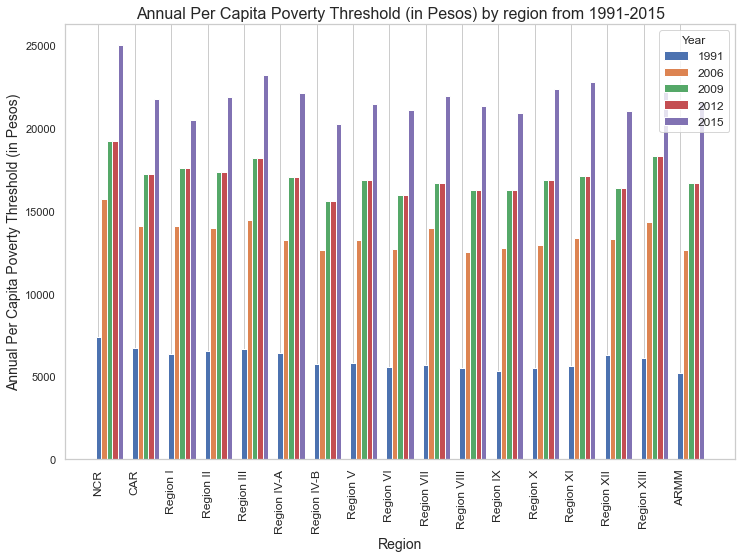

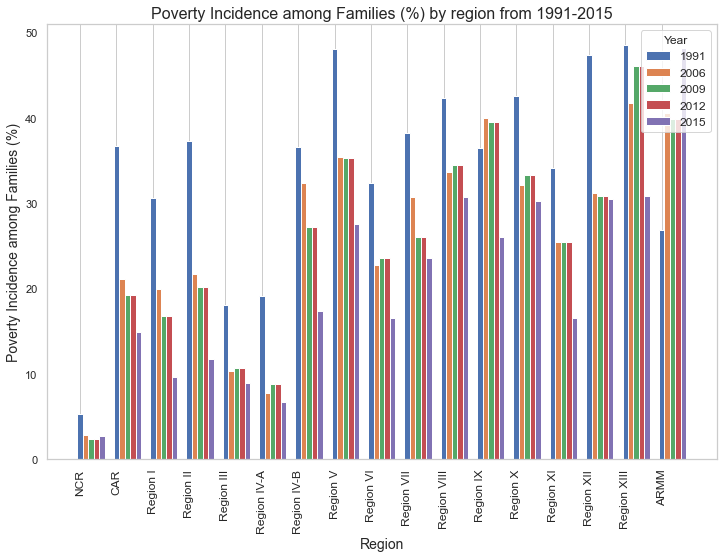

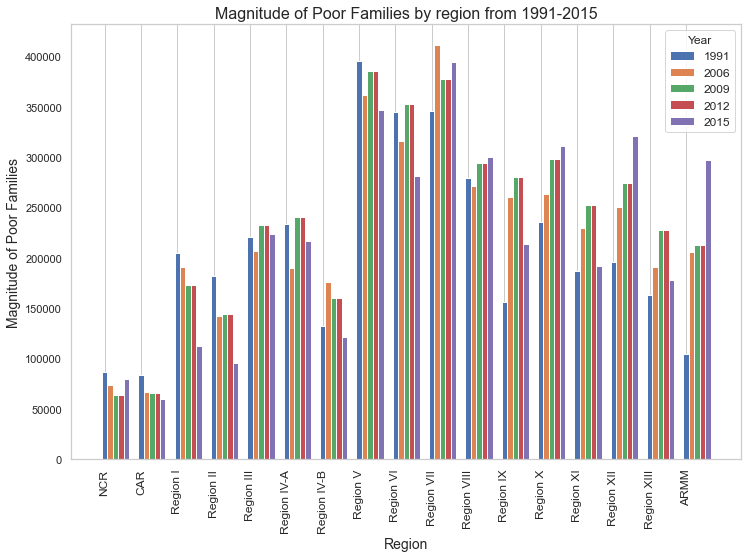

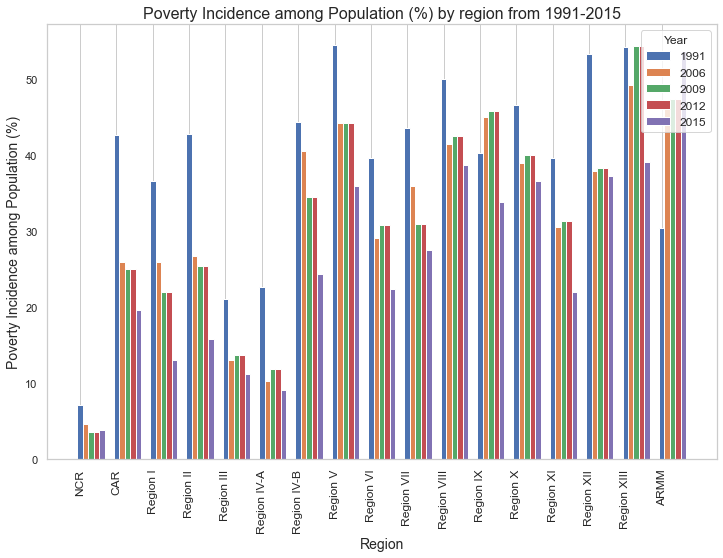

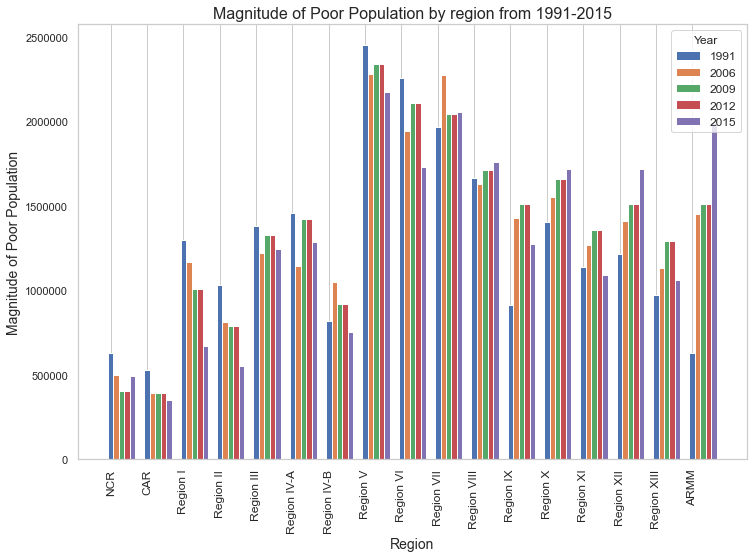

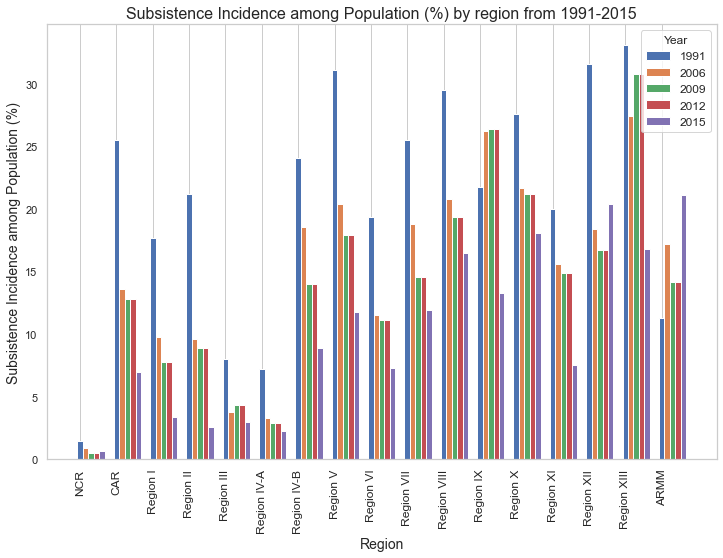

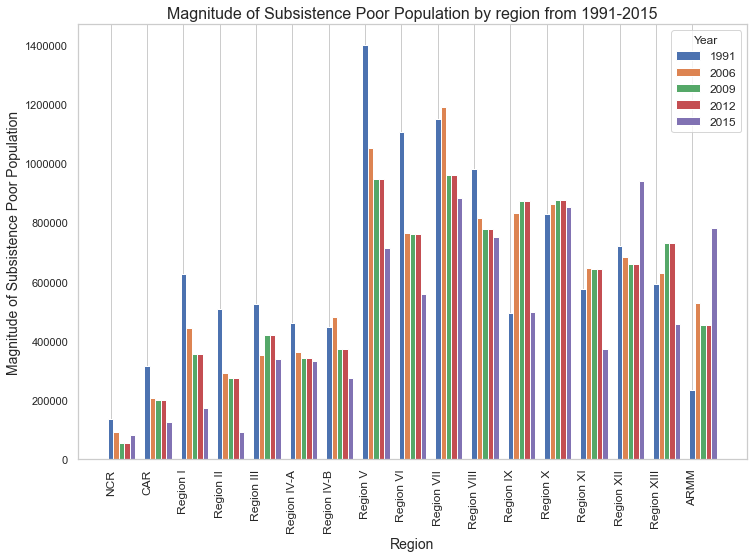

In [1352]:
def create_bar_chart(variable):       
    # Set the width of each bar
    bar_width = 0.15

    # Set the x-axis values for the bars
    r1 = np.arange(len(breakdown_per_region.index))

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))

    years = [1991, 2006, 2009, 2012, 2015]

    for i, year in enumerate(years):
        r = [x + (i * bar_width) for x in r1]
        data = data_dict[year][variable].values # Select the column corresponding to the variable
        ax.bar(r, data, width=bar_width, label=str(year))

    # Add x-axis ticks and labels
    ax.set_xticks(r1)
    ax.set_xticklabels(breakdown_per_region.index, rotation=90, fontsize=12)
    ax.set_xlabel('Region', fontsize=14)
    ax.set_ylabel(variable, fontsize=14)

    # Add a title
    ax.set_title(f"{variable} by region from 1991-2015", fontsize=16)

    # Add a legend
    ax.legend(title='Year', loc='upper right', fontsize=12)

    # Add gridlines
    ax.grid(axis='y')

    # Disable scientific notation for y-axis
    ax.ticklabel_format(axis='y', style='plain')
    
    # Show the plot
    plt.show()

from matplotlib.ticker import ScalarFormatter

for variable in tm_data_clean['Variable'].unique():
    create_bar_chart(variable)



Main theme: Generally speaking, the poverty incidence decreased over the years, but for many of the regions, the poverty remains a pressing issue for the country.
Assertion 1: The poverty incidence decreased over the years.
Assertion 2: The poverty incidence is still high.

In [1353]:
from scipy import stats
poverty_pop_by_year = poverty_pop.groupby(['Region', 'Variable', 'Year']).mean()['Value'].unstack()[[1991, 2015]]
w, p_value = stats.shapiro(list(poverty_pop_by_year[1991]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")

Shapiro-Wilk test for normality - Before group:
w =  0.8983303308486938
p-value =  0.06369682401418686
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.


In [1354]:
w, p_value = stats.shapiro(list(poverty_pop_by_year[2015]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")

Shapiro-Wilk test for normality - Before group:
w =  0.966220498085022
p-value =  0.7494743466377258
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.


Since the data is not normally distributed, we use a 2-sample t-test to test our assertion.

In [1355]:
# Perform a 2-sample t-test
z_statistic, p_value = stats.ttest_rel(list(poverty_pop_by_year[1991]), list(poverty_pop_by_year[2015]))

# Print the results
if p_value < 0.05:
    print("There is a significant difference between poverty incidence in 2015 and 1991.")
else:
    print("There is no significant difference between poverty incidence in 2015 and 1991.")
    
    
w, p_value = stats.shapiro(list(poverty_pop_by_year[2015]))



There is a significant difference between poverty incidence in 2015 and 1991.


Assertion 2: Only NCR registered a poverty incidence rate less than NEDA's goal, 9%. Hence, it is obvious that asssertion 2 is true.
Source: https://www.philstar.com/headlines/2022/08/18/2203397/neda-targets-9-poverty-rate-2028

To further support the claim, we argue that while the poverty incidence decreased significantly, the magnitude of poor population did not. 

In [1356]:
poor_pop_by_year = poor_pop.groupby(['Region', 'Variable', 'Year']).mean()['Value'].unstack()[[1991, 2015]]
w, p_value = stats.shapiro(list(poor_pop_by_year[1991]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")
    

w, p_value = stats.shapiro(list(poor_pop_by_year[2015]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")
    

Shapiro-Wilk test for normality - Before group:
w =  0.9420803785324097
p-value =  0.343691349029541
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.
Shapiro-Wilk test for normality - Before group:
w =  0.940563440322876
p-value =  0.32492688298225403
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.


In [1357]:
poor_pop_by_year = poor_pop.groupby(['Region', 'Variable', 'Year']).mean()['Value'].unstack()[[1991, 2015]]

t_stat, p_value = stats.ttest_rel(list(poor_pop_by_year[1991]), poor_pop_by_year[2015])

# Print the results and interpretation
print('Paired t-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('There is a significant difference between the magnitude of subsistence poor population in 1991 and 2015.')
else:
    print('There is no significant difference between the magnitude of subsistence poor population in 1991 and 2015.')

Paired t-test results:
t-statistic: -0.0928935227455535
p-value: 0.9271413847986325
There is no significant difference between the magnitude of subsistence poor population in 1991 and 2015.


While there is no significant difference between the magnitude of subsistence poor population in 1991 and 2015, there is a significanct difference for subsistent poor population.

In [1358]:
subsistence_poor_pop_by_year = subsistence_poor_pop.groupby(['Region', 'Variable', 'Year']).mean()['Value'].unstack()[[1991, 2015]]
w, p_value = stats.shapiro(list(subsistence_poor_pop_by_year[1991]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")
    

w, p_value = stats.shapiro(list(subsistence_poor_pop_by_year[2015]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")
    

Shapiro-Wilk test for normality - Before group:
w =  0.9456965923309326
p-value =  0.39210060238838196
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.
Shapiro-Wilk test for normality - Before group:
w =  0.9298914074897766
p-value =  0.21673427522182465
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.


In [1359]:
t_stat, p_value = stats.ttest_rel(list(subsistence_poor_pop_by_year[1991]), subsistence_poor_pop_by_year[2015])

# Print the results and interpretation
print('Paired t-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('There is a significant difference between the magnitude of subsistence poor population in 1991 and 2015.')
else:
    print('There is no significant difference between the magnitude of subsistence poor population in 1991 and 2015.')

Paired t-test results:
t-statistic: 2.4327278196181634
p-value: 0.027092409077057556
There is a significant difference between the magnitude of subsistence poor population in 1991 and 2015.


In [1360]:
subsistence_pop_by_year = subsistence_pop.groupby(['Region', 'Variable', 'Year']).mean()['Value'].unstack()[[1991, 2015]]
w, p_value = stats.shapiro(list(subsistence_pop_by_year[1991]))


# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")
    

w, p_value = stats.shapiro(list(subsistence_pop_by_year[2015]))

# Print the results
print("Shapiro-Wilk test for normality - Before group:")
print("w = ", w)
print("p-value = ", p_value)

if p_value > 0.05:
    print("There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.")
else:
    print("There is sufficient evidence to reject the null hypothesis. Thus, the data is inconsistent with a normal distribution.")
    

Shapiro-Wilk test for normality - Before group:
w =  0.934479832649231
p-value =  0.25839856266975403
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.
Shapiro-Wilk test for normality - Before group:
w =  0.9335886240005493
p-value =  0.2497640997171402
There is insufficient evidence to reject the null hypothesis. Thus,the data is consistent with a normal distribution.


In [1361]:
t_stat, p_value = stats.ttest_rel(list(subsistence_pop_by_year[1991]), subsistence_pop_by_year[2015])

# Print the results and interpretation
print('Paired t-test results:')
print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('There is a significant difference between the magnitude of subsistence poor population in 1991 and 2015.')
else:
    print('There is no significant difference between the magnitude of subsistence poor population in 1991 and 2015.')

Paired t-test results:
t-statistic: 6.0304609379563745
p-value: 1.748701066086279e-05
There is a significant difference between the magnitude of subsistence poor population in 1991 and 2015.


Addditional insights:

Poverty is multidimensional. That is, a poor person can suffer multiple disadvantages at the same time. To show that, I'll get relevant datasets and perform correlation analysis.

In [1362]:
educ_data = pd.read_excel('/Users/benjaminang/Desktop/TM/_PHILIPPINES_Statistical Tables_0.xls', sheet_name= 'T11')
educ_data

'''
The dataset was obtained from the Philippine Statistics Authority. It contains information on the highest grade/year completed by sex and region.

'''


'\nThe dataset was obtained from the Philippine Statistics Authority. It contains information on the highest grade/year completed by sex and region.\n\n'

Data cleaning

In [1363]:
useful = ['PHILIPPINES',
       'Both Sexes','High School', 'Male', 'Female', 'NATIONAL CAPITAL REGION',
       'CORDILLERA ADMINISTRATIVE REGION', 'REGION I - ILOCOS',
       'REGION II - CAGAYAN VALLEY', 'REGION III - CENTRAL LUZON',
       'REGION IV-A - CALABARZON', 'MIMAROPA REGION', 'REGION V - BICOL',
       'REGION VI - WESTERN VISAYAS', 'REGION VII - CENTRAL VISAYAS',
       'NEGROS ISLAND REGION', 'REGION VIII - EASTERN VISAYAS',
       'REGION IX - ZAMBOANGA PENINSULA', 'REGION X - NORTHERN MINDANAO',
       'REGION XI - DAVAO', 'REGION XII - SOCCSKSARGEN',
       'REGION XIII - CARAGA', 'AUTONOMOUS REGION IN MUSLIM MINDANAO'] 

educ_data = educ_data[educ_data.iloc[:, 0].isin(useful)]

educ_data = educ_data.fillna('')

educ_data = educ_data.rename(columns={ 'TABLE 11  Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015\n                \n': 'TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015' , 'Unnamed: 1': 'Total Population 5 Years Old and Over'})

# Create a dictionary of old and new column names for the remaining columns
new_cols = {}
new_cols = {f"Unnamed: {i}": age_group for i, age_group in zip(range(2, 21), 
           ['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', 
            '17', '18', '19', '20 - 24', '25 - 29', '30 - 34', '35 and over'])}

# Rename the remaining columns using the dictionary
educ_data = educ_data.rename(columns=new_cols)

educ_data = educ_data.drop(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], axis=1)

# define the region map
name_map = {'PHILIPPINES': 'Philippines',
    'NATIONAL CAPITAL REGION': 'NCR',
    'CORDILLERA ADMINISTRATIVE REGION': 'CAR',
    'REGION I - ILOCOS': 'Region I',
    'REGION II - CAGAYAN VALLEY': 'Region II',
    'REGION III - CENTRAL LUZON': 'Region III',
    'REGION IV-A - CALABARZON': 'Region IV-A',
    'MIMAROPA REGION': 'Region IV-B',
    'REGION V - BICOL': 'Region V',
    'REGION VI - WESTERN VISAYAS': 'Region VI',
    'REGION VII - CENTRAL VISAYAS': 'Region VII',
    'NEGROS ISLAND REGION': 'Region VII',
    'REGION VIII - EASTERN VISAYAS': 'Region VIII',
    'REGION IX - ZAMBOANGA PENINSULA': 'Region IX',
    'REGION X - NORTHERN MINDANAO': 'Region X',
    'REGION XI - DAVAO': 'Region XI',
    'REGION XII - SOCCSKSARGEN': 'Region XII',
    'REGION XIII - CARAGA': 'Region XIII',
    'AUTONOMOUS REGION IN MUSLIM MINDANAO': 'ARMM',
    'Both Sexes': 'Total Population at a given Age Range',
    'High School': 'Number of High School Undergraduates/Graduates',
    'Male': 'Number of Males',
    'Female': 'Number of Females'
}

region_map = {'PHILIPPINES': 'Philippines',
    'NATIONAL CAPITAL REGION': 'NCR',
    'CORDILLERA ADMINISTRATIVE REGION': 'CAR',
    'REGION I - ILOCOS': 'Region I',
    'REGION II - CAGAYAN VALLEY': 'Region II',
    'REGION III - CENTRAL LUZON': 'Region III',
    'REGION IV-A - CALABARZON': 'Region IV-A',
    'MIMAROPA REGION': 'Region IV-B',
    'REGION V - BICOL': 'Region V',
    'REGION VI - WESTERN VISAYAS': 'Region VI',
    'REGION VII - CENTRAL VISAYAS': 'Region VII',
    'NEGROS ISLAND REGION': 'Region VII',
    'REGION VIII - EASTERN VISAYAS': 'Region VIII',
    'REGION IX - ZAMBOANGA PENINSULA': 'Region IX',
    'REGION X - NORTHERN MINDANAO': 'Region X',
    'REGION XI - DAVAO': 'Region XI',
    'REGION XII - SOCCSKSARGEN': 'Region XII',
    'REGION XIII - CARAGA': 'Region XIII',
    'AUTONOMOUS REGION IN MUSLIM MINDANAO': 'ARMM'
}

regions = ['NCR', 'ARMM', 'CAR', 'Region XIII', 'Region VI', 'Region V',
       'Region III', 'Region IV-A', 'Region VIII', 'Region VII',
       'Region X', 'Region II', 'Region XI', 'Region I', 'Region IV-B',
       'Region XII', 'Region IX', 'Philippines']
# replace the values in the 'TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015' column
educ_data['TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015'] = \
    educ_data['TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015'].replace(name_map)

# print the first 5 rows of the modified DataFrame
summarized_educ_data = educ_data[['TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015', 'Total Population 5 Years Old and Over']]


new_column = []
for value in summarized_educ_data['TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015']:
    if value in regions:
        new_column.append(value)
    else:
        new_column.append('')


summarized_educ_data['Region'] = new_column

summarized_educ_data = summarized_educ_data[['Region', 'TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015', 'Total Population 5 Years Old and Over']]
summarized_educ_data







/var/folders/jv/0sr2mpzx5klfxvmfj4s39_vm0000gn/T/ipykernel_91413/4210359482.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summarized_educ_data['Region'] = new_column


,Region,"TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015",Total Population 5 Years Old and Over
4,Philippines,Philippines,
5,,Total Population at a given Age Range,90160372
13,,Number of High School Undergraduates/Graduates,32859661
23,,Number of Males,45479477
31,,Number of High School Undergraduates/Graduates,16545197
41,,Number of Females,44680895
49,,Number of High School Undergraduates/Graduates,16314464
59,NCR,NCR,
60,,Total Population at a given Age Range,11676810
68,,Number of High School Undergraduates/Graduates,4549396


makeempty_map = {'Philippines': " ",
    'NCR': " ",
    'CAR': " ",
    'Region I': " ",
    'Region II' : " ",
    'Region III': " ",
    'Region IV-A': " ",
    'Region IV-B': " ",
    'Region V': " " ,
    'Region VI': " ",
    'Region VII': " ",
    'Region VII': " ",
    'Region VIII': " ",
    'Region IX': " ",
    'Region X': " ",
    'Region XI': " ",
    'Region XII': " ",
    'Region XIII': " ",
    'ARMM': " "}


summarized_educ_data['TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015'] = \
    summarized_educ_data['TABLE 11 Total Population 5 Years Old and Over by Highest Grade/Year Completed, Sex, Age, and Region: 2015'].replace(makeempty_map)
    

summarized_educ_data.head()

In [1364]:
data_ph = summarized_educ_data.iloc[0:7, :]
data_ncr = summarized_educ_data.iloc[7:14, :]
data_car = summarized_educ_data.iloc[14:21, :]
data_I = summarized_educ_data.iloc[21:28, :]
data_II = summarized_educ_data.iloc[28:35, :]
data_III = summarized_educ_data.iloc[35:42, :]
data_IVA = summarized_educ_data.iloc[42:49, :]
data_IVB = summarized_educ_data.iloc[49:56, :]
data_V = summarized_educ_data.iloc[56:63, :]
data_VI = summarized_educ_data.iloc[63:70, :]
data_VII = summarized_educ_data.iloc[70:84, :]
data_VIII = summarized_educ_data.iloc[84:91, :]
data_IX = summarized_educ_data.iloc[91:98, :]
data_X = summarized_educ_data.iloc[98:105, :]
data_XI = summarized_educ_data.iloc[105:112, :]
data_XII = summarized_educ_data.iloc[112:119, :]
data_XIII = summarized_educ_data.iloc[119:126, :]
data_ARMM = summarized_educ_data.iloc[126:133, :]


data_per_region = {
    'Philippines': data_ph,
    'NCR': data_ncr,
    'CAR': data_car,
    'Region I': data_I,
    'Region II': data_II,
    'Region III': data_III,
    'Region IV-A': data_IVA,
    'Region IV-B': data_IVB,
    'Region V': data_V,
    'Region VI': data_VI,
    'Region VII': data_VII,
    'Region VIII': data_VIII,
    'Region IX': data_IX,
    'Region X': data_X,
    'Region XI': data_XI,
    'Region XII': data_XII,
    'Region XIII': data_XIII,
    'ARMM': data_ARMM
}

I calculate the proportion of high school undergraduates/graduates per region.

In [1365]:
df = pd.DataFrame(list(data_per_region.keys()), columns=['Region'])

proportion = []
for region in data_per_region:
    proportion.append(data_per_region[region].iloc[2,2]/data_per_region[region].iloc[1,2])
    
df['Proportion of High School Undergraduates/Graduates'] = proportion

df = df.iloc[1:18, :]

df['Poverty Incidence among Population'] = list(0.01*(breakdown_per_region_2015['Poverty Incidence among Population (%)']))

df


,Region,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population
1,NCR,0.39,0.04
2,CAR,0.32,0.20
3,Region I,0.42,0.13
4,Region II,0.35,0.16
5,Region III,0.41,0.11
6,Region IV-A,0.41,0.09
7,Region IV-B,0.34,0.24
8,Region V,0.35,0.36
9,Region VI,0.34,0.22
10,Region VII,0.35,0.28


Since we're given a correlation of -0.8, we can say that there is a strong negative correlation between proportion of high school undergradates/graduates and poverty incidence.

In [1366]:
df.corr()

,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population
Proportion of High School Undergraduates/Graduates,1.00,-0.80
Poverty Incidence among Population,-0.80,1.00


To easily visuzalize the data, I created a simple scatter plot.

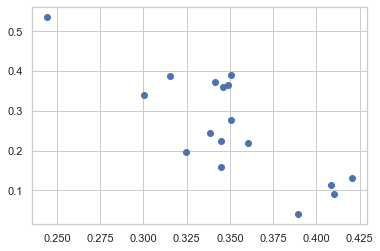

In [1367]:
plt.scatter(df['Proportion of High School Undergraduates/Graduates'], df['Poverty Incidence among Population'])

We can model the relationship by using simple linear regression.

In [1368]:
y = df['Poverty Incidence among Population']

#define predictor variables
x = df['Proportion of High School Undergraduates/Graduates']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

/Users/benjaminang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/benjaminang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Poverty Incidence among Population   R-squared:                       0.648
Model:                                            OLS   Adj. R-squared:                  0.624
Method:                                 Least Squares   F-statistic:                     27.56
Date:                                Mon, 24 Apr 2023   Prob (F-statistic):           9.80e-05
Time:                                        03:27:34   Log-Likelihood:                 19.526
No. Observations:                                  17   AIC:                            -35.05
Df Residuals:                                      15   BIC:                            -33.38
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  1.1348      0.168      6.774      0.000       0.778       1.492
Proportion of High School Undergraduates/Graduates    -2.4996      0.476     -5.250      0.000      -3.515      -1.485
==============================================================================
Omnibus:                        0.599   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.596
Skew:                          -0.066   Prob(JB):                        0.742
Kurtosis:                       2.092   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the R^2 is just 0.648, the proportion of people who atended highschool does cannot accurately predict the poverty incidence. Thus, another variable is needed to build a better model.

I obtaied the hospital bed density by region through a DOH file, which analyzed the Philippine Healthcare system. I added the hospital bed density per region to our dataframe.

In [1369]:
number_of_beds = [27779, 2472, 4163, 2779, 8218, 9459, 2093, 4156, 5714, 6190, 2845, 2909, 4858, 4580, 3680, 1718, 586]
rate_per_1000_population = [2.47, 1.52, 0.84, 0.86, 0.84, 0.83, 0.73, 0.76, 0.78, 0.92, 0.67, 0.87, 1.16, 1.08, 0.94,0.7, 0.17]

# The hospital bed density and number of beds data is from 2008
# df['Number of Beds'] = number_of_beds

df['Hospital Bed Density'] = rate_per_1000_population

df

,Region,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population,Hospital Bed Density
1,NCR,0.39,0.04,2.47
2,CAR,0.32,0.20,1.52
3,Region I,0.42,0.13,0.84
4,Region II,0.35,0.16,0.86
5,Region III,0.41,0.11,0.84
6,Region IV-A,0.41,0.09,0.83
7,Region IV-B,0.34,0.24,0.73
8,Region V,0.35,0.36,0.76
9,Region VI,0.34,0.22,0.78
10,Region VII,0.35,0.28,0.92


Notice that the hospital bed density and poverty incidence has moderately negative correlation. Thus, adding the hospital bed density will improve the R^2 of the multiregression.

In [1370]:
df.corr()

,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population,Hospital Bed Density
Proportion of High School Undergraduates/Graduates,1.00,-0.80,0.39
Poverty Incidence among Population,-0.80,1.00,-0.59
Hospital Bed Density,0.39,-0.59,1.00


In [1371]:
#Multilinear regression of the dataset

y = df['Poverty Incidence among Population']

#define predictor variables
x = df[['Proportion of High School Undergraduates/Graduates', 'Hospital Bed Density' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

/Users/benjaminang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/benjaminang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Poverty Incidence among Population   R-squared:                       0.738
Model:                                            OLS   Adj. R-squared:                  0.701
Method:                                 Least Squares   F-statistic:                     19.73
Date:                                Mon, 24 Apr 2023   Prob (F-statistic):           8.44e-05
Time:                                        03:27:34   Log-Likelihood:                 22.052
No. Observations:                                  17   AIC:                            -38.10
Df Residuals:                                      14   BIC:                            -35.60
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  1.0846      0.151      7.174      0.000       0.760       1.409
Proportion of High School Undergraduates/Graduates    -2.1073      0.461     -4.574      0.000      -3.095      -1.119
Hospital Bed Density                                  -0.0915      0.042     -2.201      0.045      -0.181      -0.002
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.672
Skew:                           0.346   Prob(JB):                        0.715
Kurtosis:                       2.314   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that if we only choose the regions with the highest poverty incidence, the correlation between the poverty incidence to proportion of high school undergraduates/graduates and hospital bed density strengthens. An insight then is that the regions with the highest poverty incidence has a low proportion of high school attendees and a high hospital bed density.

In [1372]:
df

,Region,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population,Hospital Bed Density
1,NCR,0.39,0.04,2.47
2,CAR,0.32,0.20,1.52
3,Region I,0.42,0.13,0.84
4,Region II,0.35,0.16,0.86
5,Region III,0.41,0.11,0.84
6,Region IV-A,0.41,0.09,0.83
7,Region IV-B,0.34,0.24,0.73
8,Region V,0.35,0.36,0.76
9,Region VI,0.34,0.22,0.78
10,Region VII,0.35,0.28,0.92


In [1373]:
highest_poverty_incidence = df.sort_values('Poverty Incidence among Population', ascending = False).head()
highest_poverty_incidence



,Region,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population,Hospital Bed Density
17,ARMM,0.24,0.54,0.17
16,Region XIII,0.35,0.39,0.70
11,Region VIII,0.32,0.39,0.67
15,Region XII,0.34,0.37,0.94
13,Region X,0.35,0.37,1.16


In [1374]:
highest_poverty_incidence.corr()

,Proportion of High School Undergraduates/Graduates,Poverty Incidence among Population,Hospital Bed Density
Proportion of High School Undergraduates/Graduates,1.00,-0.95,0.89
Poverty Incidence among Population,-0.95,1.00,-0.91
Hospital Bed Density,0.89,-0.91,1.00


Although R-squared is now 0.927, but we cannot claim that the independent variables accurately predict poverty incidence because of the high p-values. The high p-values signify that there is no evidence to suggest that the coefficients are significant. A reason for the high p-value is multicolinearity, which is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

In [1376]:
#Multilinear regression of the reduced dataset

y = highest_poverty_incidence['Poverty Incidence among Population']

#define predictor variables
x = highest_poverty_incidence[['Proportion of High School Undergraduates/Graduates', 'Hospital Bed Density' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
model.summary()

/Users/benjaminang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/benjaminang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Poverty Incidence among Population   R-squared:                       0.927
Model:                                            OLS   Adj. R-squared:                  0.855
Method:                                 Least Squares   F-statistic:                     12.76
Date:                                Mon, 24 Apr 2023   Prob (F-statistic):             0.0727
Time:                                        03:28:49   Log-Likelihood:                 13.224
No. Observations:                                   5   AIC:                            -20.45
Df Residuals:                                       2   BIC:                            -21.62
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  0.8053      0.163      4.946      0.039       0.105       1.506
Proportion of High School Undergraduates/Graduates    -1.1031      0.662     -1.667      0.237      -3.951       1.745
Hospital Bed Density                                  -0.0568      0.080     -0.710      0.551      -0.401       0.287
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.116
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.158
Skew:                          -1.170   Prob(JB):                        0.560
Kurtosis:                       2.705   Cond. No.                         72.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Recommendations:

For future iterations of this analysis, I suggest the following:
1. Hospital bed density does not encapsulate healthcaare. For a better model, we need a better metric that would capture the overall state of healthcare.
2. Ensure that the independent variables are correlated with the poverty incidence but not correlated with themselves.
3. Get more independent variables to improve the fit.


In [ ]:
diff = poor_pop_by_year[2015] - poor_pop_by_year[1991]

sum(list(diff))/sum(poor_pop_by_year[1991])
# for slides


In [ ]:
sum(list(subsistence_poor_pop_by_year[2015]- subsistence_poor_pop_by_year[1991]))